In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv')

#day of week, time, temperature, humidity, light on/off, aircon on/off, aircon temp, room, class
df.columns = ["day", "hour", "minute", "temperature", "humidity", "light_state", "aircon_state", "aircon_temp", "room", "class"]

# tentatively reduced to 5 features for POC
y = df['class']
X = df.drop('class', axis = 1)
X = X.drop('minute', axis = 1)
X = X.drop('aircon_temp', axis = 1)
X = X.drop('room', axis = 1)
X = X.drop('humidity', axis = 1)

X

,day,hour,temperature,light_state,aircon_state
0,5,0,27.5,0,0
1,5,0,28.5,1,0
2,5,0,27.5,1,0
3,5,0,29.5,1,0
4,5,0,27.5,1,0
...,...,...,...,...,...
32250,4,23,28.5,1,0
32251,4,23,27.5,0,0
32252,4,23,28.5,1,0
32253,4,23,28.5,1,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scalers improved the accuracy but don't really know how to use it on the individual datas to test yet
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 363   22   18    0    0    0    0    0]
 [   8 2027    0    8    0    0    0    0]
 [   7    0 1740    5    0    0    0    0]
 [   0   17   35  370    0    0    0    0]
 [   0    0    0    0  380    0    7    0]
 [   0    0    0    0    6  619    0    1]
 [   0    0    0    0   14    0  668    0]
 [   0    0    0    3    0   14   14  105]]
              precision    recall  f1-score   support

        wddc       0.96      0.90      0.93       403
        wddh       0.98      0.99      0.99      2043
        wdnc       0.97      0.99      0.98      1752
        wdnh       0.96      0.88      0.92       422
        wedc       0.95      0.98      0.97       387
        wedh       0.98      0.99      0.98       626
        wenc       0.97      0.98      0.97       682
        wenh       0.99      0.77      0.87       136

    accuracy                           0.97      6451
   macro avg       0.97      0.94      0.95      6451
weighted avg       0.97      0.97      0.97      6451



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# proof of concept below
wedh = classifier.predict([[6,10,32.0,0,1]])
print(wedh)

wddh = classifier.predict([[3,10,32.0,0,1]])
print(wddh)

wddc = classifier.predict([[3,10,26.0,0,1]])
print(wddc)

wenh = classifier.predict([[6,23,27.0,0,1]])
print(wenh)

['wedh']
['wddh']
['wdnc']
['wedc']


d:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

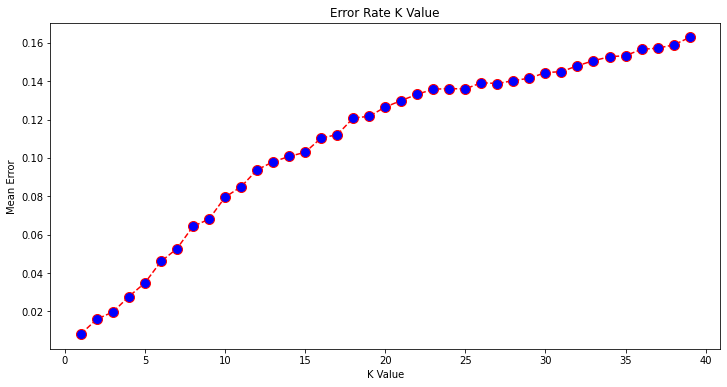

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')